In [35]:
import pandas as pd

# Load the dataset
data = pd.read_csv("AB_NYC_2019.csv")

# Display the first few rows of the dataset
print(data.head())

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

# **Data Cleaning and Data Wrangling:**

Checking for missing values:

In [36]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)


Missing values:
 id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [37]:
# let us check if the columns are already dropped
print(data.columns)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


In [38]:
# we still can get rid of 'last_review'
data["last_review"] = data["last_review"].fillna("1900-01-01")

In [39]:
# for the 'number_of_reviews' we can assume that there is no review, so we assign it to 0
data["reviews_per_month"] = data["reviews_per_month"].fillna(0)

Checking for duplicate rows:

In [40]:
# Check for duplicate rows
duplicate_rows = data.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

# Remove duplicate rows, if any
if duplicate_rows > 0:
    data = data.drop_duplicates()

Number of duplicate rows: 0


Convert categorical variables into numerical values:

For the NYC Airbnb dataset, the categorical variables are "neighbourhood_group", "neighbourhood", and "room_type". We'll use one-hot encoding to convert them into numerical values:

In [41]:
# One-hot encoding of categorical variables
data = pd.get_dummies(data, columns=["neighbourhood_group", "neighbourhood", "room_type"])

# **Data analysis and visualization:**

Let us visualize the relationship between price and the number of reviews:

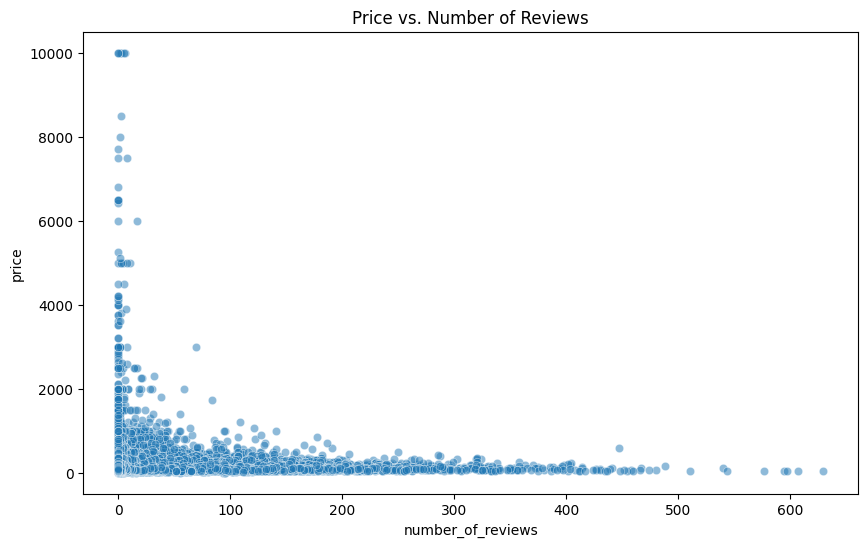

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatterplot of price vs. number_of_reviews
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="number_of_reviews", y="price", alpha=0.5)
plt.title("Price vs. Number of Reviews")
plt.show()

Let us see the **price distribution**, in order to get deeper insights into the dataset.

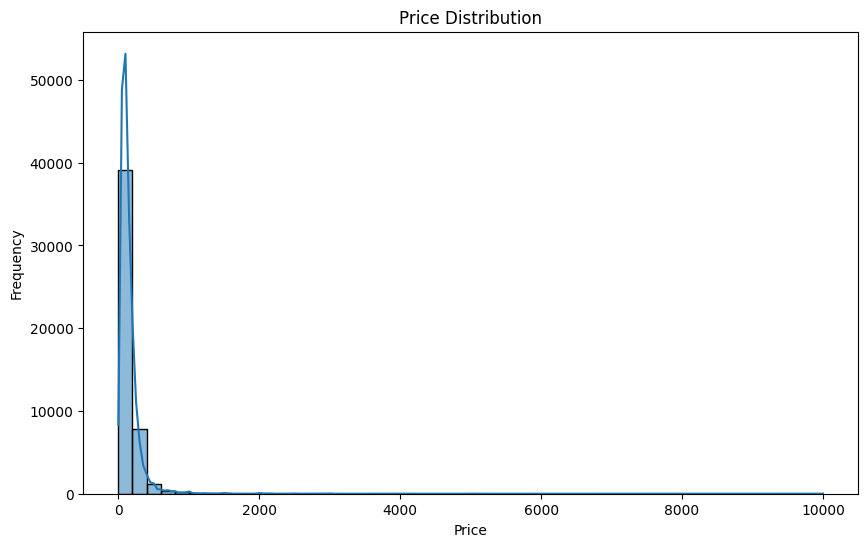

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="price", bins=50, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

From this plot, we can observe that the majority of listings have prices in the lower range, with a few listings having much higher prices. This indicates a right-skewed distribution, meaning there are some high-priced outliers that could potentially affect our analysis or predictions.

**Distribution of listings by room type:**

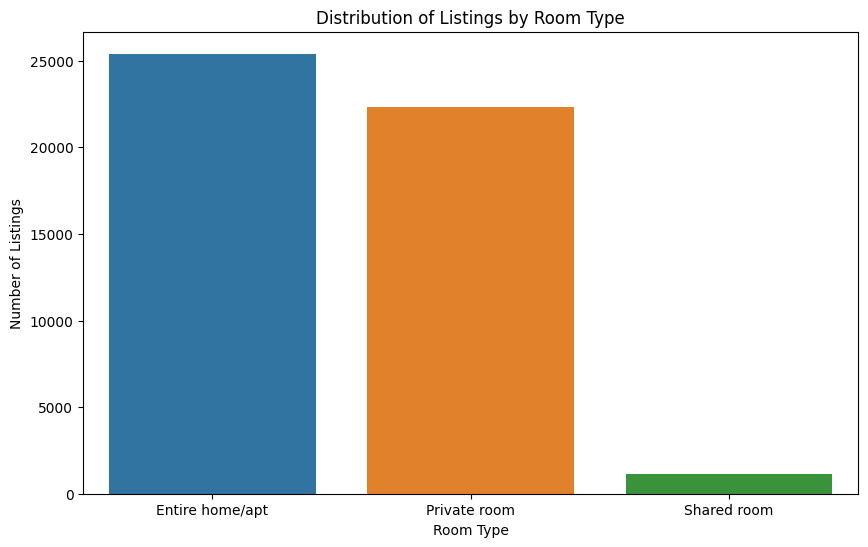

In [44]:
room_type_columns = [col for col in data.columns if "room_type_" in col]
room_type_counts = data[room_type_columns].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=room_type_counts.index, y=room_type_counts.values)
plt.title("Distribution of Listings by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Number of Listings")
plt.xticks(ticks=range(len(room_type_columns)), labels=[col.replace("room_type_", "") for col in room_type_columns])
plt.show()

If we look at this plot, we can observe that entire homes/apartments are the most common listing type, followed by private rooms and shared rooms. This information can be useful for understanding the market demand for different room types and for making strategic decisions when listing a property on Airbnb.

**Average price per neighbourhood group:**

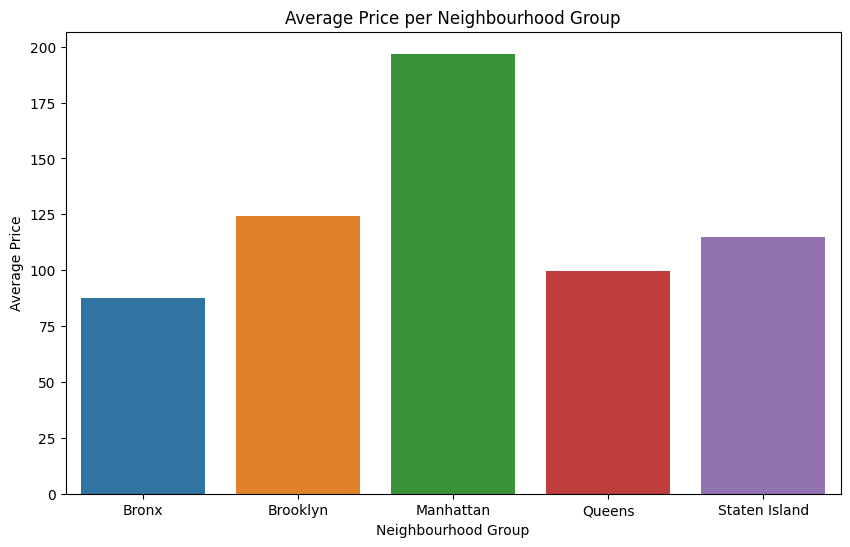

In [45]:
# Reverse one-hot encoding for neighbourhood_group column
neighbourhood_group_columns = [col for col in data.columns if "neighbourhood_group_" in col]
data["neighbourhood_group"] = data[neighbourhood_group_columns].idxmax(axis=1).str.replace("neighbourhood_group_", "")

# Calculate average price per neighbourhood group
average_price_by_neighbourhood_group = data.groupby("neighbourhood_group")["price"].mean()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=average_price_by_neighbourhood_group.index, y=average_price_by_neighbourhood_group.values)
plt.title("Average Price per Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Average Price")
plt.show()

As we can see from the generated plot, some neighbourhood groups, like Manhattan, have higher average prices compared to others, such as Queens or Staten Island. This information can be valuable for hosts who want to set competitive prices in their neighbourhood or for guests who are looking for more affordable options.

**Average price per room type:**

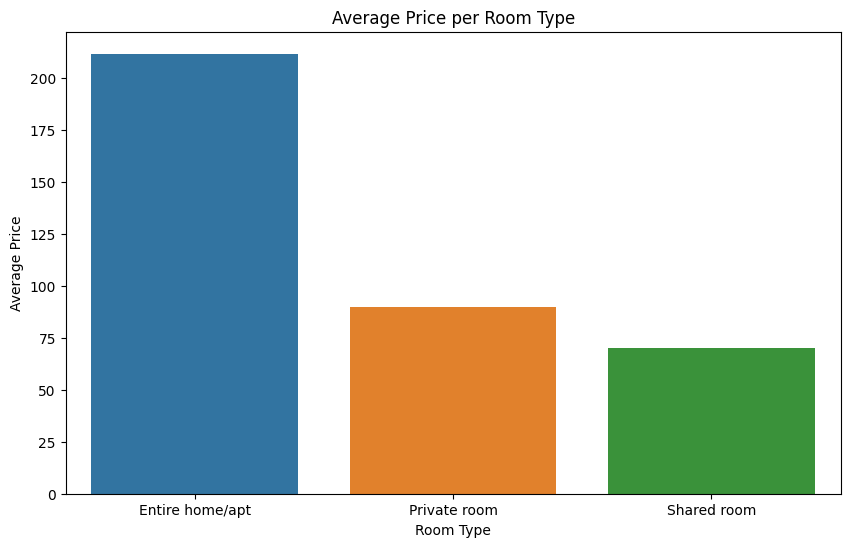

In [46]:
# Reverse one-hot encoding for room_type column
room_type_columns = [col for col in data.columns if "room_type_" in col]
data["room_type"] = data[room_type_columns].idxmax(axis=1).str.replace("room_type_", "")

# Calculate average price per room type
average_price_by_room_type = data.groupby("room_type")["price"].mean()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=average_price_by_room_type.index, y=average_price_by_room_type.values)
plt.title("Average Price per Room Type")
plt.xlabel("Room Type")
plt.ylabel("Average Price")
plt.show()

This plot shows us that entire homes/apartments have the highest average price, followed by private rooms and shared rooms. This information can help hosts set appropriate prices based on the room type they are offering and can help guests make informed decisions about which room type best fits their budget and preferences.

# **Prediction Model**

We'll split the dataset into features (X) and target variable (y), and then further split the data into training and testing sets.

In [47]:
# Prepare the dataset
X = data.drop(columns=["price", "id", "host_id", "last_review", "neighbourhood_group", "room_type", "name", "host_name"])
y = data["price"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**LINEAR REGRESSION:**

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create the Linear Regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Make predictions
y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Linear Regression - Mean Squared Error: {mse:.2f}")
print(f"Linear Regression - R-squared: {r2:.2f}")

Linear Regression - Mean Squared Error: 621268196339442.00
Linear Regression - R-squared: -14043692190.18


**RANDOM FOREST REGRESSION:**

In [33]:
from sklearn.ensemble import RandomForestRegressor

# Create the Random Forest Regression model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
random_forest_model.fit(X_train, y_train)

# Make predictions
y_pred = random_forest_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Random Forest Regression - Mean Squared Error: {mse:.2f}")
print(f"Random Forest Regression - R-squared: {r2:.2f}")

Random Forest Regression - Mean Squared Error: 39566.08
Random Forest Regression - R-squared: 0.11


# **Data Visualization**

In [51]:
import plotly.express as px

# 1. Bar Chart of Average Price by Neighbourhood Group
average_price_by_neighbourhood_group = data.groupby("neighbourhood_group")["price"].mean().reset_index()
bar_chart1 = px.bar(average_price_by_neighbourhood_group, x="neighbourhood_group", y="price", title="Average Price by Neighbourhood Group")

# 2. Pie Chart of Listings by Room Type
room_type_counts = data["room_type"].value_counts().reset_index()
pie_chart1 = px.pie(room_type_counts, values="room_type", names="index", title="Listings by Room Type")

# 3. Scatterplot of Price vs. Number of Reviews
scatter_chart1 = px.scatter(data, x="number_of_reviews", y="price", title="Price vs. Number of Reviews")

# 4. Map of Listings
map_chart1 = px.scatter_mapbox(data, lat="latitude", lon="longitude", color="neighbourhood_group", size="price",
                               color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10,
                               mapbox_style="carto-positron", title="Map of Listings")

# 5. Bar Chart of Number of Listings by Neighbourhood Group
listings_by_neighbourhood_group = data["neighbourhood_group"].value_counts().reset_index()
bar_chart2 = px.bar(listings_by_neighbourhood_group, x="index", y="neighbourhood_group", title="Number of Listings by Neighbourhood Group")

# Display the visualizations
bar_chart1.show()
pie_chart1.show()
scatter_chart1.show()
map_chart1.show()
bar_chart2.show()